In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Load the dataset

In [2]:
X = np.loadtxt('gatlin.csv', delimiter=',')
print('X is of shape {}'.format(X.shape))
print(X)

X is of shape (480, 640)
[[30. 31. 29. ... 55. 54. 56.]
 [30. 30. 29. ... 53. 53. 53.]
 [30. 30. 28. ... 52. 52. 52.]
 ...
 [13. 13. 13. ... 26. 25. 26.]
 [15. 15. 15. ... 28. 28. 28.]
 [17. 18. 18. ... 27. 28. 27.]]


## TODO: Perform SVD on the X matrix

In [3]:
U, S, V = np.linalg.svd(X)

print('U is of shape {}'.format(U.shape))
print('S is of shape {}'.format(S.shape))
print('V is of shape {}'.format(V.shape))

U is of shape (480, 480)
S is of shape (480,)
V is of shape (640, 640)


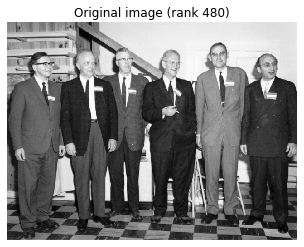

In [4]:
# Plot the original image
plt.figure(1)
plt.imshow(X, cmap=cm.Greys_r)
plt.title('Original image (rank 480)')
plt.axis('off')
plt.draw()

Matrix reconstruction using the top k = [10, 20, 50, 100, 200] singular values

## TODO: Create four matrices X10, X20, X50, X100, X200 for each low rank approximation

In [6]:
X10 = np.dot(np.dot(U[:, :10], np.diag(S)[:10, :10]), V[:10, :])
X20 = np.dot(np.dot(U[:, :20], np.diag(S)[:20, :20]), V[:20, :])
X50 = np.dot(np.dot(U[:, :50], np.diag(S)[:50, :50]), V[:50, :])
X100 = np.dot(np.dot(U[:, :100], np.diag(S)[:100, :100]), V[:100, :])
X200 = np.dot(np.dot(U[:, :200], np.diag(S)[:200, :200]), V[:200, :])

Error of approximation
## TODO: Compute and print(the error of each low rank approximation of the matrix

In [7]:
print("Error for k=10 : {:.4f}".format(np.linalg.norm(X-X10) / np.linalg.norm(X)))
print("Error for k=20 : {:.4f}".format(np.linalg.norm(X-X20) / np.linalg.norm(X)))
print("Error for k=50 : {:.4f}".format(np.linalg.norm(X-X50) / np.linalg.norm(X)))
print("Error for k=100 : {:.4f}".format(np.linalg.norm(X-X100) / np.linalg.norm(X)))
print("Error for k=200 : {:.4f}".format(np.linalg.norm(X-X200) / np.linalg.norm(X)))

Error for k=10 : 0.1909
Error for k=20 : 0.1324
Error for k=50 : 0.0650
Error for k=100 : 0.0327
Error for k=200 : 0.0136


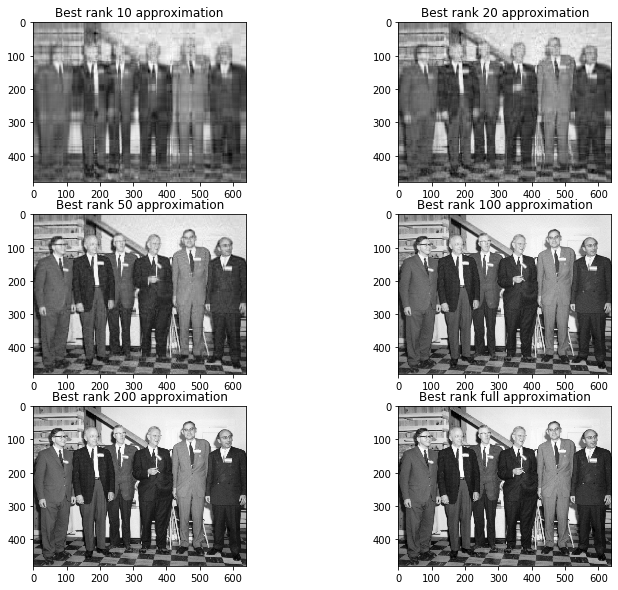

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
Xs = [X10, X20, X50, X100, X200, X]
ranks = ['10', '20', '50', '100', '200', 'full']
axs = axs.ravel()

for i in range(len(Xs)):
    axs[i].imshow(Xs[i], cmap=cm.Greys_r)
    axs[i].set_title('Best rank ' + ranks[i] + ' approximation')

Plot the singular values of the original matrix
## TODO: Plot the singular values of X versus their rank k

Text(0.5, 1.0, 'Singular values of the "gatlin" image matrix')

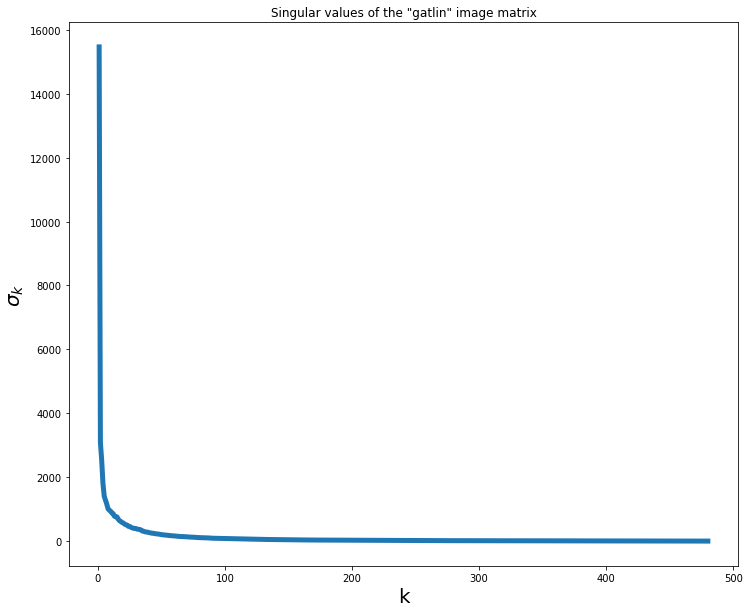

In [8]:
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.plot(np.arange(len(S)) + 1, S, linewidth=5)
plt.xlabel('k', fontsize=20)
plt.ylabel('$\sigma_k$', fontsize=20)
plt.title('Singular values of the "gatlin" image matrix')